In [3]:
from toolbox.data import read_data, read_geojson, read_coastline, process_roommates
from toolbox.fit import CONFIG
from toolbox.model_pipeline import preprocess_data
import matplotlib.pyplot as plt

In [4]:
data = read_data()

C:\Radboud\2223\DataMiningProject\data-mining-project\venv\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [5]:
import pandas as pd
import numpy as np


# index = (data['rent'] < 1000) & (data['areaSqm'] < 30) #44646
# index = index & (data['areaSqm'] < 30) #34735

# data = data[index] # limit areaSq by 30 or 50


print(data.shape)

data = preprocess_data(CONFIG)
# data = data[index]


(46722, 63)


C:\Radboud\2223\DataMiningProject\data-mining-project\venv\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


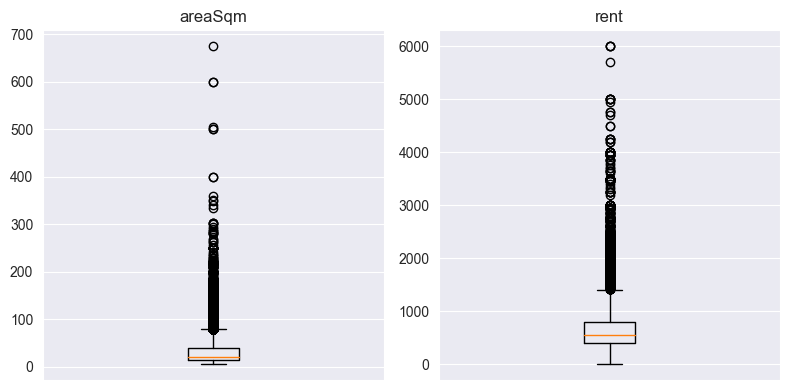

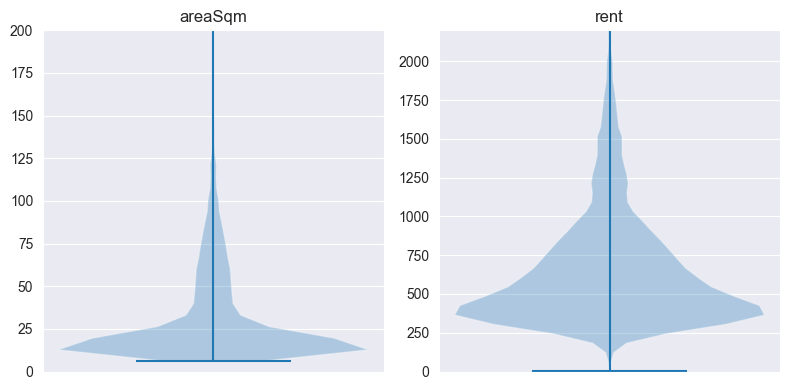

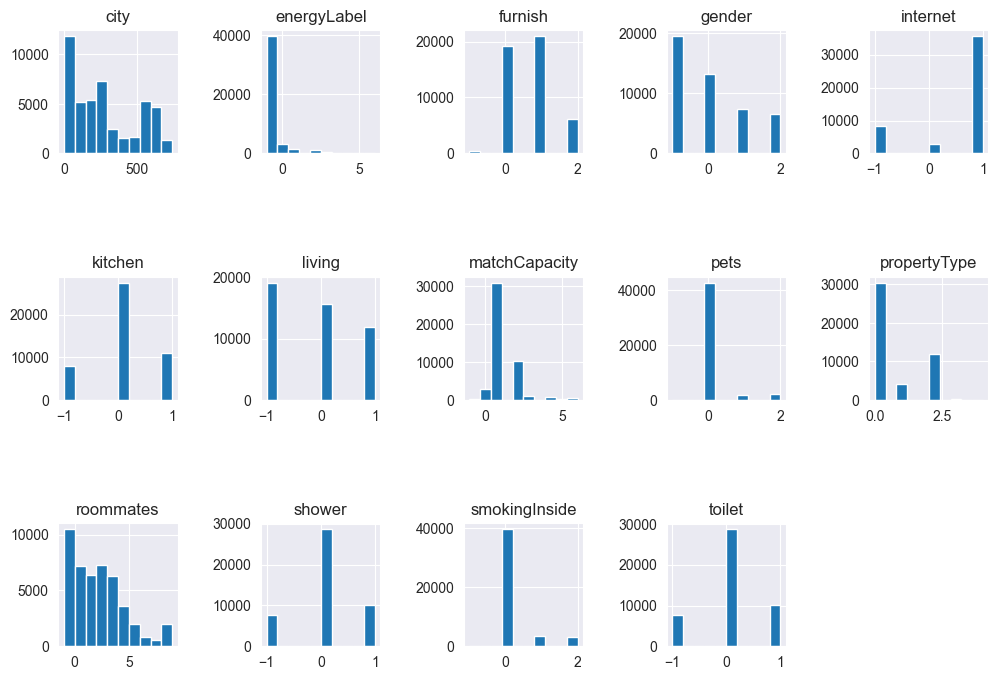

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns # nicer graphics
sns.set_style('darkgrid')
boxplot_attributes = [  'areaSqm',
                'rent']

attributes = [# 'additionalCosts',
                'city',
                # 'deposit',
                'energyLabel',
                'furnish',
                'gender',
                'internet',
                'kitchen',
                'living',
                'matchCapacity',
                # 'matchStatus',
                'pets',
                'propertyType',
                'roommates',
                'shower',
                'smokingInside',
                'toilet']



boxplot_data = data[boxplot_attributes].values
d = data[attributes].values
# print(d)
boxplot_x = 1
boxplot_y = len(boxplot_attributes)

x = 3
y = 5
h_space = 1
w_space = 0.7

# plt.figure()
fig, axes = plt.subplots(boxplot_x, boxplot_y, figsize=(8,4))
fig.subplots_adjust(hspace=h_space, wspace=w_space)
for n in range(boxplot_x * boxplot_y):

    axes[n].boxplot(boxplot_data[:, n])
    axes[n].set(title=boxplot_attributes[n])
plt.savefig("plots/feature_boxplots.pdf")
# Set the ticks and ticklabels for all axes
plt.setp(axes, xticks=[])
fig.tight_layout()
plt.show()

fig, axes = plt.subplots(boxplot_x, boxplot_y, figsize=(8,4))
fig.subplots_adjust(hspace=h_space, wspace=w_space)
for n in range(boxplot_x * boxplot_y):
    axes[n].violinplot(boxplot_data[:, n])
    axes[n].set(title=boxplot_attributes[n])
    print()
    if boxplot_attributes[n] == 'areaSqm':
        axes[n].set_ylim([0, 200])
    if boxplot_attributes[n] == 'rent':
        axes[n].set_ylim([0, 2200])
plt.savefig("plots/feature_violinplots.pdf")
plt.setp(axes, xticks=[])
fig.tight_layout()
plt.show()

# plt.figure()
fig, axes = plt.subplots(x, y, figsize=(12,8))
fig.subplots_adjust(hspace=h_space, wspace=w_space)
for n in range(len(attributes)):
# for n in range(x * y):
    # if(n == len(attributes)):
    #     break
    axes[n // y, n % y].hist(d[:, n])
    axes[n // y, n % y].set(title=attributes[n])

axes[-1, -1].axis('off')

plt.savefig("plots/feature_histograms.pdf")
plt.show()